In [4]:
import pandas as pd

dataset = pd.read_csv('sim_rtds_exposure.csv')
dataset1 = pd.read_csv('sim_sact_regimen.csv')



C:\Users\jeril\AppData\Local\Temp\ipykernel_13616\1641909769.py:3: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('sim_rtds_exposure.csv')


In [10]:
import pandas as pd

# Merge the two dataframes based on the columns "PATIENTID" and "ENCORE_PATIENT_ID"
merged_data = dataset.merge(dataset1, left_on='PATIENTID', right_on='ENCORE_PATIENT_ID', how='inner')


In [11]:
# Sort the merged dataset in ascending order of PATIENTID
sorted_data = merged_data.sort_values(by='PATIENTID', ascending=True)


In [12]:
sorted_data.head(20)

,PRESCRIPTIONID,RADIOISOTOPE,RADIOTHERAPYBEAMTYPE,RADIOTHERAPYBEAMENERGY,TIMEOFEXPOSURE,APPTDATE,ATTENDID,PATIENTID,RADIOTHERAPYEPISODEID,LINKCODE,...,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,INTENT_OF_TREATMENT,DATE_DECISION_TO_TREAT,START_DATE_OF_REGIMEN,MAPPED_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,BENCHMARK_GROUP,LINK_NUMBER
0,10000298,NaN,T1,6.00,08:50,2016-07-20,10000298.20160720,10004026,1460739,LNG,...,1.50,62.0,P,2016-01-25,2016-01-28,RUXOLITINIB,02,N,RUXOLITINIB,101122661
1,10000298,NaN,T1,6.00,08:52,2016-07-20,10000298.20160720,10004026,1460739,LNG,...,1.50,62.0,P,2016-01-25,2016-01-28,RUXOLITINIB,02,N,RUXOLITINIB,101122661
2,10000298,NaN,T1,6.00,08:53,2016-07-20,10000298.20160720,10004026,1460739,LNG,...,1.50,62.0,P,2016-01-25,2016-01-28,RUXOLITINIB,02,N,RUXOLITINIB,101122661
3,10000298,NaN,T2,6.00,1899-,2016-07-23,10000298.20160723,10004026,1460739,LNG,...,1.50,62.0,P,2016-01-25,2016-01-28,RUXOLITINIB,02,N,RUXOLITINIB,101122661
29,10000995,NaN,T1,6.00,10:27,2013-12-18,10000995.20131218,10013266,1160781,LQS,...,1.79,98.0,NaN,2020-11-26,2020-12-10,Avelumab,02,NaN,AVELUMAB,101054570
28,10000995,NaN,T1,6.00,10:27,2013-12-18,10000995.20131218,10013266,1160781,LQS,...,1.52,75.0,NaN,2018-11-20,2018-12-15,CARBOPLATIN,02,NaN,CARBOPLATIN,101054570
27,10000995,NaN,T1,6.00,10:26,2013-12-18,10000995.20131218,10013266,1160781,LQS,...,1.79,98.0,NaN,2020-11-26,2020-12-10,Avelumab,02,NaN,AVELUMAB,101054570
26,10000995,NaN,T1,6.00,10:26,2013-12-18,10000995.20131218,10013266,1160781,LQS,...,1.52,75.0,NaN,2018-11-20,2018-12-15,CARBOPLATIN,02,NaN,CARBOPLATIN,101054570
25,10000995,NaN,T1,6.00,13:56,2013-12-17,10000995.20131217,10013266,1160781,LQS,...,1.79,98.0,NaN,2020-11-26,2020-12-10,Avelumab,02,NaN,AVELUMAB,101054570
24,10000995,NaN,T1,6.00,13:56,2013-12-17,10000995.20131217,10013266,1160781,LQS,...,1.52,75.0,NaN,2018-11-20,2018-12-15,CARBOPLATIN,02,NaN,CARBOPLATIN,101054570


In [13]:
# Identify duplicate PATIENTID with different WEIGHT_AT_START_OF_REGIMEN values
duplicates = sorted_data[sorted_data.duplicated(subset=['PATIENTID'], keep=False)]

# Display the rows with duplicate PATIENTID
print(duplicates)


         PRESCRIPTIONID RADIOISOTOPE RADIOTHERAPYBEAMTYPE  \
0              10000298          NaN                   T1   
1              10000298          NaN                   T1   
2              10000298          NaN                   T1   
3              10000298          NaN                   T2   
29             10000995          NaN                   T1   
...                 ...          ...                  ...   
6721843       250009406          NaN                   T1   
6721838       250009406          NaN                   T1   
6721837       250009406          NaN                   T1   
6721839       250009406          NaN                   T1   
6721844       250009406          NaN                   T1   

         RADIOTHERAPYBEAMENERGY TIMEOFEXPOSURE    APPTDATE  \
0                           6.0          08:50  2016-07-20   
1                           6.0          08:52  2016-07-20   
2                           6.0          08:53  2016-07-20   
3                  

In [15]:
duplicates.isnull().sum()


PRESCRIPTIONID                      0
RADIOISOTOPE                  6697559
RADIOTHERAPYBEAMTYPE            22238
RADIOTHERAPYBEAMENERGY          19696
TIMEOFEXPOSURE                      0
APPTDATE                        14224
ATTENDID                            0
PATIENTID                           0
RADIOTHERAPYEPISODEID               0
LINKCODE                            0
ENCORE_PATIENT_ID                   0
MERGED_REGIMEN_ID                   0
HEIGHT_AT_START_OF_REGIMEN     491731
WEIGHT_AT_START_OF_REGIMEN     505345
INTENT_OF_TREATMENT           1489887
DATE_DECISION_TO_TREAT         564705
START_DATE_OF_REGIMEN           11190
MAPPED_REGIMEN                 348969
CLINICAL_TRIAL                 393961
CHEMO_RADIATION               1654952
BENCHMARK_GROUP                     0
LINK_NUMBER                         0
dtype: int64

In [16]:
duplicates[duplicates.isin([np.inf, -np.inf]).any(1)]


C:\Users\jeril\AppData\Local\Temp\ipykernel_13616\3801264498.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  duplicates[duplicates.isin([np.inf, -np.inf]).any(1)]


,PRESCRIPTIONID,RADIOISOTOPE,RADIOTHERAPYBEAMTYPE,RADIOTHERAPYBEAMENERGY,TIMEOFEXPOSURE,APPTDATE,ATTENDID,PATIENTID,RADIOTHERAPYEPISODEID,LINKCODE,...,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,INTENT_OF_TREATMENT,DATE_DECISION_TO_TREAT,START_DATE_OF_REGIMEN,MAPPED_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,BENCHMARK_GROUP,LINK_NUMBER


In [17]:
# Select specific columns from the sorted data
selected_data = sorted_data[['RADIOTHERAPYBEAMENERGY', 'PATIENTID', 'WEIGHT_AT_START_OF_REGIMEN']]

# Display the resulting DataFrame
print(selected_data)


         RADIOTHERAPYBEAMENERGY  PATIENTID  WEIGHT_AT_START_OF_REGIMEN
0                           6.0   10004026                        62.0
1                           6.0   10004026                        62.0
2                           6.0   10004026                        62.0
3                           6.0   10004026                        62.0
29                          6.0   10013266                        98.0
...                         ...        ...                         ...
6721843                     6.0  250002533                        16.9
6721838                     6.0  250002533                        61.0
6721837                     6.0  250002533                        78.8
6721839                     6.0  250002533                        49.0
6721844                     6.0  250002533                         NaN

[6721845 rows x 3 columns]


In [19]:
# Remove rows with null values
cleaned_data = selected_data.dropna()

# Display the resulting DataFrame without null values
print(cleaned_data)


         RADIOTHERAPYBEAMENERGY  WEIGHT_AT_START_OF_REGIMEN
0                           6.0                        62.0
1                           6.0                        62.0
2                           6.0                        62.0
3                           6.0                        62.0
29                          6.0                        98.0
...                         ...                         ...
6721840                     6.0                        88.0
6721843                     6.0                        16.9
6721838                     6.0                        61.0
6721837                     6.0                        78.8
6721839                     6.0                        49.0

[6195847 rows x 2 columns]


In [20]:
import pandas as pd
import statsmodels.api as sm


# duplicates contains rows with duplicate PATIENTID
duplicates = sorted_data[sorted_data.duplicated(subset=['PATIENTID'], keep=False)]

# Select specific columns for the analysis
selected_data = duplicates[['RADIOTHERAPYBEAMENERGY', 'WEIGHT_AT_START_OF_REGIMEN']]

# Remove rows with null values
cleaned_data = selected_data.dropna()

# Perform linear regression analysis on the cleaned data
X = cleaned_data['RADIOTHERAPYBEAMENERGY']
Y = cleaned_data['WEIGHT_AT_START_OF_REGIMEN']

# Add a constant term to the independent variable
X = sm.add_constant(X)

#  linear regression model
model = sm.OLS(Y, X).fit()

# Get the summary of the regression analysis
print(model.summary())


                                OLS Regression Results                                
Dep. Variable:     WEIGHT_AT_START_OF_REGIMEN   R-squared:                       0.000
Model:                                    OLS   Adj. R-squared:                  0.000
Method:                         Least Squares   F-statistic:                     126.4
Date:                        Thu, 09 Nov 2023   Prob (F-statistic):           2.52e-29
Time:                                16:50:41   Log-Likelihood:            -2.7487e+07
No. Observations:                     6195847   AIC:                         5.497e+07
Df Residuals:                         6195845   BIC:                         5.497e+07
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

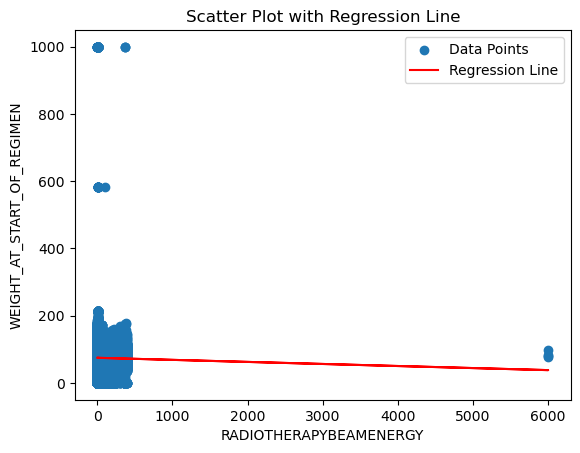

In [22]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 
# duplicates contains rows with duplicate PATIENTID
duplicates = sorted_data[sorted_data.duplicated(subset=['PATIENTID'], keep=False)]

# Select specific columns for the analysis
selected_data = duplicates[['RADIOTHERAPYBEAMENERGY', 'WEIGHT_AT_START_OF_REGIMEN']]

# Remove rows with null values
cleaned_data = selected_data.dropna()

# Perform linear regression analysis on the cleaned data
X = cleaned_data['RADIOTHERAPYBEAMENERGY']
Y = cleaned_data['WEIGHT_AT_START_OF_REGIMEN']

# Add a constant term to the independent variable
X = sm.add_constant(X)

#  linear regression model
model = sm.OLS(Y, X).fit()

# Plot the scatter plot with the regression line
plt.scatter(cleaned_data['RADIOTHERAPYBEAMENERGY'], cleaned_data['WEIGHT_AT_START_OF_REGIMEN'], label='Data Points')
plt.plot(cleaned_data['RADIOTHERAPYBEAMENERGY'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('RADIOTHERAPYBEAMENERGY')
plt.ylabel('WEIGHT_AT_START_OF_REGIMEN')
plt.title('Scatter Plot with Regression Line')
plt.legend()
plt.show()
